# DS HW 2


---


# Muhammad Abdullah
## ma07534



---



In [1]:
import pandas as pd
import missingno as msno
import numpy as np

In [2]:
df = pd.read_csv('FIFA_Players_Data.csv')

In [3]:
df.head()

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,skill_ball_control,power_stamina
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,27,6/24/1987,169,67,Argentina,FC Barcelona,93,...,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,96,77-1
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,2/5/1985,185,80,Portugal,Real Madrid,92,...,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,92-3,89
2,9014,A. Robben,Arjen Robben,30,1/23/1984,180,80,Netherlands,FC Bayern München,90,...,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,90+1,78+11
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,32,10/3/1981,195,95,Sweden,Paris Saint-Germain,90,...,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,90,78
4,167495,M. Neuer,Manuel Neuer,28,3/27/1986,193,92,Germany,FC Bayern München,90,...,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,31,44+9


Now i will find columns with missing values.

In [4]:
df.columns[df.isna().any()]

Index(['release_clause_eur', 'team_position', 'team_jersey_number', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'],
      dtype='object')

<Axes: >

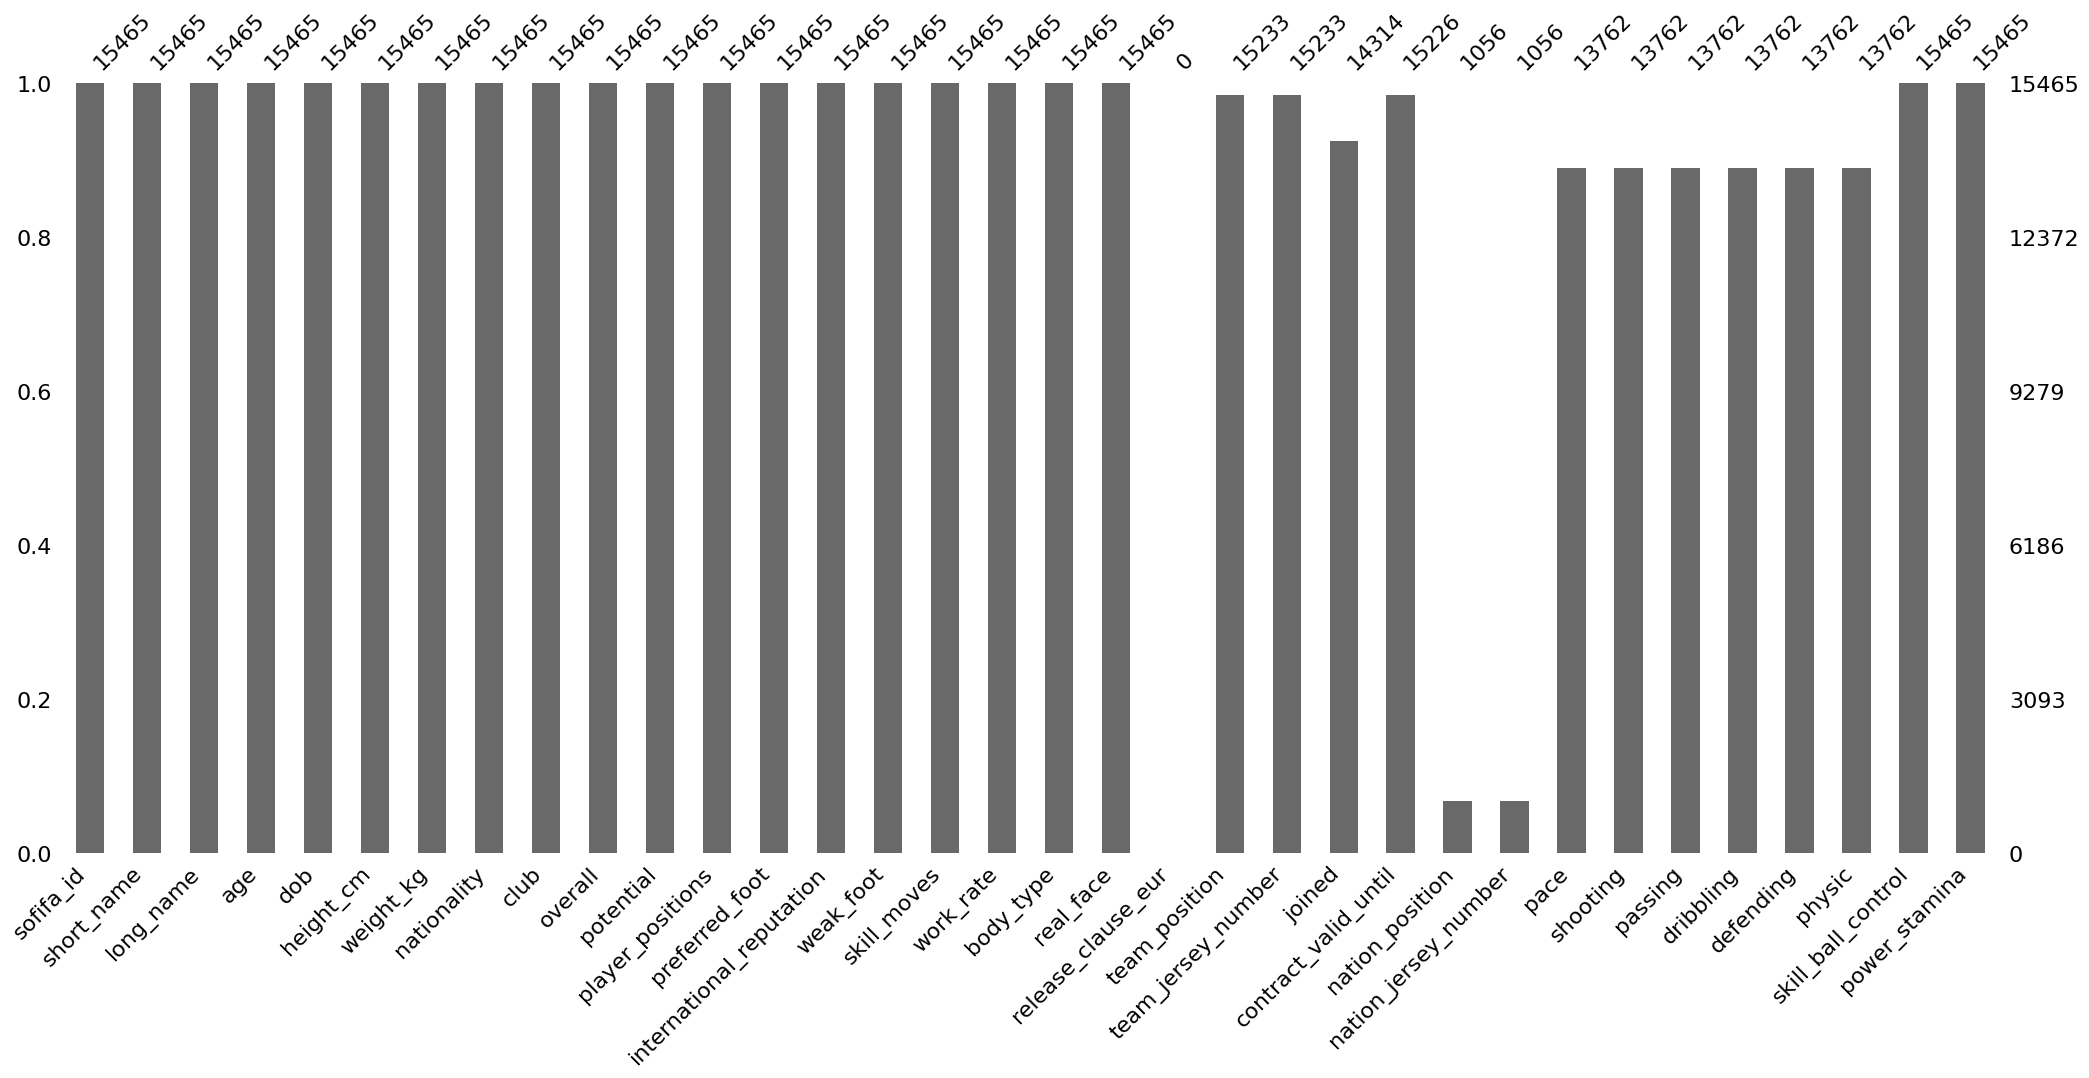

In [5]:
msno.bar(df)

In [6]:
df_missingcolumns = df.isna()
df_missingcolumns.mean() * 100

,0
sofifa_id,0.000000
short_name,0.000000
long_name,0.000000
age,0.000000
dob,0.000000
height_cm,0.000000
weight_kg,0.000000
nationality,0.000000
club,0.000000
overall,0.000000


The release_clause_eur column shows 100% missing values. We can either impute this using advanced methods like using an api or some other data. Or we can drop it.

In [7]:
df.drop('release_clause_eur', axis=1, inplace=True)

In [8]:
df.columns[df.isna().any()]

Index(['team_position', 'team_jersey_number', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic'],
      dtype='object')

Now I will focus on the team_position column. Considering that a footballer typically plays in a similar position for their nation as well as for their club, we can check for missing values in team_position, find the corresponding nation_position value and impute team_position using that.

In [9]:
df['team_position'].fillna(df['nation_position'], inplace=True)

In [10]:
df.columns[df.isna().any()]

Index(['team_jersey_number', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic'],
      dtype='object')



---


We can see that team_position has no missing values now. We can now apply the same logic to nation_position. For missing values of the nation_position column we can impute using corresponding team_position values.

In [11]:
df['nation_position'].fillna(df['team_position'], inplace=True)

In [12]:
df.columns[df.isna().any()]

Index(['team_jersey_number', 'joined', 'contract_valid_until',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic'],
      dtype='object')

We can see that nation_position does not have missing values either now. We could also have used the player_position column but I opted not to use that because that only shows the positions in which the player can play, but it does not factor in the quality of the player. Someone who is a substitute at a club or their nation team is a substitute generally because of their form and quality and we need to factor that in both the club and nation team position columns.


---



Now let us focus on the nation_jersey_number and team_jersey_number column. In football, player numbers are related to their positions on the field. GKs typically have #1 if they are the first team GK, and Forwards have 9/10/11. Therefore a good way to impute missing values in nation_jersey_number and team_jersey_number is by using the mode of the groups of position and jersey numbers.

In [13]:
mode_jersey = df.groupby('nation_position')['nation_jersey_number'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
df['nation_jersey_number'] = df.apply(lambda x: mode_jersey[x['nation_position']] if pd.isna(x['nation_jersey_number']) else x['nation_jersey_number'], axis=1)

While this works for every entry in the columns, this does not work for reserves. For reserves I will impute using the team jersey number.

In [14]:
df['nation_jersey_number'].fillna(df['team_jersey_number'], inplace=True)

In [15]:
mode_jersey = df.groupby('team_position')['team_jersey_number'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
df['team_jersey_number'] = df.apply(lambda x: mode_jersey[x['team_position']] if pd.isna(x['team_jersey_number']) else x['team_jersey_number'], axis=1)

The msno bar graph shows us that less than 10% of the values in the joined column are missing. Now we must think of a suitable way to impute values.
Before doing that it is helpful to fix the format of the year and date values from strings to datetime format.

In [16]:
df['joined'] = pd.to_datetime(df['joined'], format='%m/%d/%Y', errors='coerce').dt.date
df['dob'] = pd.to_datetime(df['dob'], format='%m/%d/%Y', errors='coerce').dt.date

Now we will calculate every players age when they joined their clubs. For this we can use the date of birth and the joined column.

Using the age at joining column, we find the median age at which players typically joined.

In [17]:
df['age_at_joining'] = pd.to_datetime(df['joined']).dt.year - pd.to_datetime(df['dob']).dt.year
median_age_at_joining = df['age_at_joining'].median()
df['joined'] = df['joined'].fillna(pd.to_datetime(df['dob']) + pd.DateOffset(years=median_age_at_joining))

Converting the values back to string. This is not a problem since the values are now clean and organized. Also, this allows me to open the dataframe in google sheets.

In [18]:
df['joined'] = pd.to_datetime(df['joined'], errors='coerce').dt.strftime('%Y-%m-%d')
df['dob'] = pd.to_datetime(df['dob'], errors='coerce').dt.strftime('%Y-%m-%d')

In [19]:
df['joined'].isna().sum()

0



---

Now we have missing values in 'pace', 'shooting', 'passing', 'dribbling', 'defending' columns because these are parameters that we judge outfield players for, unless in rare cases like teams that play out of the back like FC Barcelona or Manchester City. The most fair manner to deal with these missing values will be to drop the GK rows completely. To do this we keep the rest of the dataset that does not contain 'GK' in the player_positions column.

In [20]:
df = df.loc[df['player_positions'].str.contains('GK', na=False) == False]

In [21]:
df.columns[df.isna().any()]

Index(['contract_valid_until', 'age_at_joining'], dtype='object')

I will now use the joined and contract valid until column group to use the mode
values for imputation of missing values in contract valid until.

---



In [22]:
print(df['joined'].dtype, df['contract_valid_until'].dtype)

object float64


I will impute the missing values in contract valid until via the mode. This makes sense as most players' contracts tend to end around a certain time. (The value is a year)

In [23]:
df['contract_valid_until'].fillna(df['contract_valid_until'].mode()[0], inplace=True)

<ipython-input-23-0cbf2c83a427>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contract_valid_until'].fillna(df['contract_valid_until'].mode()[0], inplace=True)




---

Some values in clubs are nationalities. These might be due to the possibility that these players must be free agents. We will put No Club in these intersecting values.

---



In [24]:
common_values = set(df['nationality']).intersection(set(df['club']))

for value in common_values:
  df.loc[df['club'] == value, 'club'] = 'No Club'

The last step is to drop the age_at_joining column since it was not in the original dataset.

In [25]:
df.drop('age_at_joining', axis=1, inplace=True)

In [26]:
print(df['skill_ball_control'].dtype, df['power_stamina'])

object 0         77-1
1           89
2        78+11
3           78
5           86
         ...  
15460       56
15461       47
15462    74+13
15463       70
15464       25
Name: power_stamina, Length: 13762, dtype: object


Now i will convert these columns to integers and perform the operation listed with the value

In [27]:
def calculate(value):
    if isinstance(value, str) and ('+' in value or '-' in value):
        return eval(value)

    return int(value)

df['skill_ball_control'] = df['skill_ball_control'].apply(calculate).astype('Int64')
df['power_stamina'] = df['power_stamina'].apply(calculate).astype('Int64')

And finally I fix the column names for the cleaned dataset, removing the underscore from them and capitalizing them.

In [28]:
lstcols = df.columns.to_list()
lst2 = [x.replace('_', ' ').title() for x in lstcols]
df2 = df.copy()
df2.columns = lst2

In [29]:
df2.columns.isna().sum()

0

In [30]:
df2.to_csv('cleaned_fifa_players_data.csv')

# Part 2


#Generate appropriate summary (count, mean, median or mode) tables using group
#keyword in pandas. Include at least two tables analysis or results

In [32]:
club_overall_summary = df.groupby('club').agg(mean_overall=('overall', 'mean'), max_overall=('overall', 'max'), player_count=('short_name', 'count')).reset_index()

top_clubs_by_overall = club_overall_summary.sort_values(by='max_overall', ascending=False)

print(top_clubs_by_overall.head(10))

                    club  mean_overall  max_overall  player_count
185         FC Barcelona     79.952381           93            21
419          Real Madrid     75.655172           92            29
384  Paris Saint-Germain     79.450000           90            20
188    FC Bayern München     78.153846           90            26
115              Chelsea     72.366667           88            30
328    Manchester United     73.620690           88            29
327      Manchester City     74.571429           87            28
72     Borussia Dortmund     75.137931           86            29
41               Arsenal     75.535714           86            28
287             Juventus     74.655172           85            29


This summary shows the top 10 clubs with the highest overalls, sorted by descending max overall values. FC Barcelona is the highest ranked club as they had Messi in that dataset, which unfortunately did not remain the case for the 2022 dataset.

In [33]:
nationality_overall_summary = df.groupby('nationality').agg(mean_overall=('overall', 'mean'), max_overall=('overall', 'max'), player_count=('short_name', 'count')).reset_index()

filtered_nationality_overall = nationality_overall_summary[nationality_overall_summary['player_count'] >= 10]

top_nationalities_by_max_overall = filtered_nationality_overall.sort_values(by='max_overall', ascending=False)

print(top_nationalities_by_max_overall.head(10))

     nationality  mean_overall  max_overall  player_count
4      Argentina     66.509021           93           776
109     Portugal     67.757377           92           305
126       Sweden     62.018750           90           320
96   Netherlands     66.857143           90           343
138      Uruguay     68.219298           89           114
47        France     65.520566           88           778
51       Germany     66.064516           88           589
12       Belgium     65.401674           88           239
28      Colombia     63.580713           88           477
32       Croatia     66.423077           87            78


This summary shows the top 10 nations with the highest overalls, sorted by descending max overall values. Argentina is the highest ranked nation as they had Messi in that dataset, which fortunately led to them winning the 2022 Fifa WC.



---

#Generate appropriate visualizations for Univariate analysis
#*   At least one bar chart
#*   At least one histogram



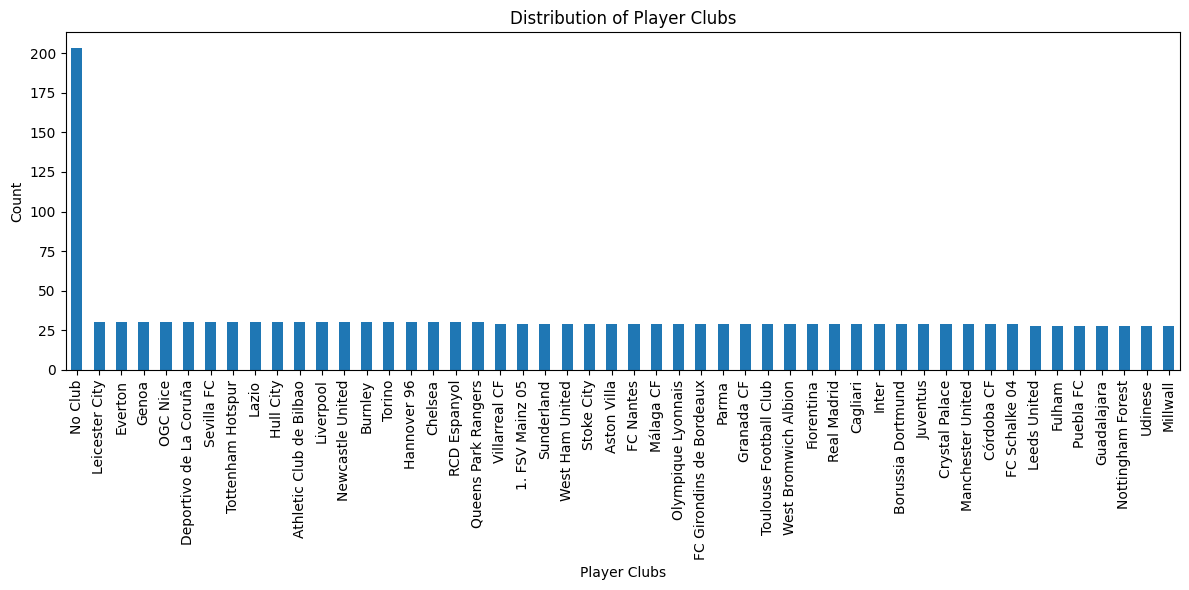

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
df['club'].value_counts().nlargest(50).plot(kind='bar')
plt.title('Distribution of Player Clubs')
plt.xlabel('Player Clubs')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In this bar chart we can observe the top 50 clubs in terms of player counts. We can see that No Club is an outlier statistic, it shows a very large number of free agents/players with no clubs. The 49 other clubs show almost the same counts.

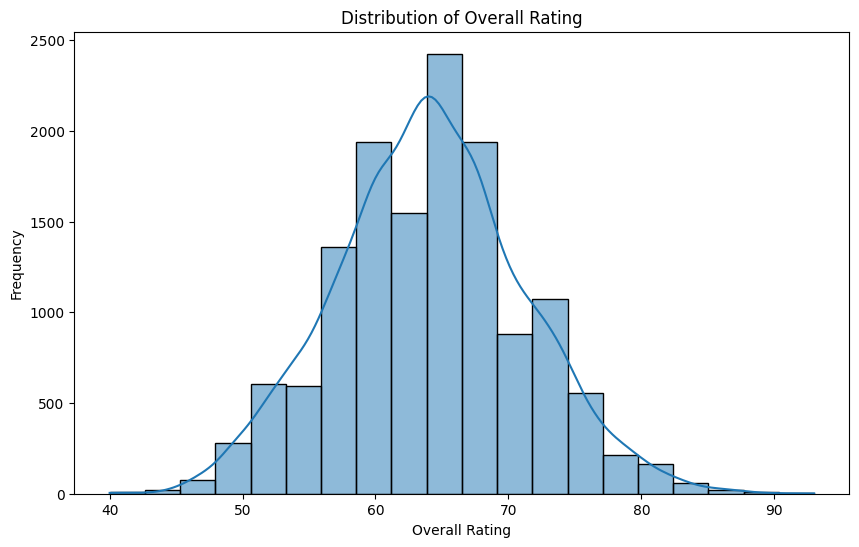

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['overall'], bins=20, kde=True)
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

Dividing the data into 40 intervals and plotting the histogram for overall rating vs frequency shows that the ratings follow a normal distribution. The mean is between 60 and 70 as the distribution appears to be centred there.



---


Generate appropriate visualizations for Bivariate analysis


*    At least one scatter plot (continuous vs continuous)
*   At least one visualization for (discrete vs continuous)
*   One correlation plot

<Figure size 1200x600 with 0 Axes>

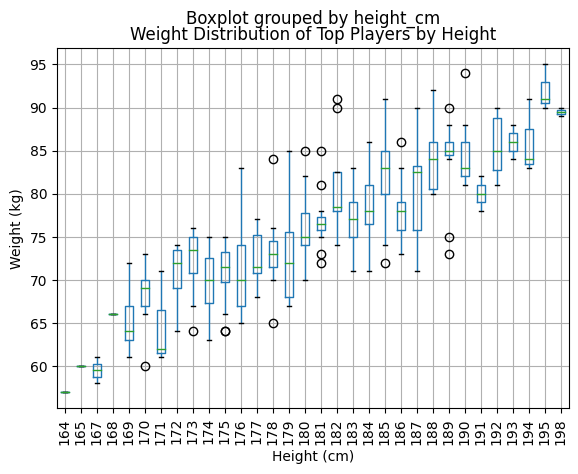

In [36]:
top_players = df[df['overall'] >= 80]

plt.figure(figsize=(12, 6))
top_players.boxplot(column='weight_kg', by='height_cm', grid=True, rot=90)

plt.title('Weight Distribution of Top Players by Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Targeting only elite players above 80 overall, in this continous v continous bivariate analysis we can see how generally the more elite players have higher weights and are taller. Height v Weight is an important measure for all atheletes. Both of these are measures of physical conditions of athletes. Generally, higher weights are related to taller heights as bones have high mass density and the bone weight is a contributor to the body weight.

<Figure size 1200x600 with 0 Axes>

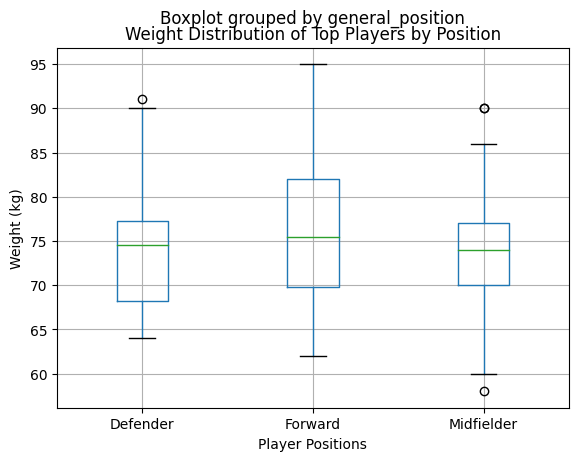

In [37]:
position_mapping = {
    'CF': 'Forward', 'ST': 'Forward', 'LW': 'Forward', 'RW': 'Forward',
    'CAM': 'Midfielder', 'CM': 'Midfielder', 'CDM': 'Midfielder', 'RDM': 'Midfielder', 'LDM': 'Midfielder', 'LM': 'Midfielder', 'RM': 'Midfielder', 'LCM' : 'Midfielder', 'RCM' : 'Midfielder' ,
    'CB': 'Defender', 'LB': 'Defender', 'RB': 'Defender', 'LWB': 'Defender', 'RWB': 'Defender',
}

df['general_position'] = df['team_position'].map(position_mapping)

top_players = df[df['overall'] >= 80]

plt.figure(figsize=(12, 6))
top_players.boxplot(column='weight_kg', by='general_position', grid=True, rot=0)

plt.title('Weight Distribution of Top Players by Position')
plt.xlabel('Player Positions')
plt.ylabel('Weight (kg)')
plt.show()

Targeting only elite players above 80 overall, in this continous v discrete bivariate analysis we can see how generally the in the more elite players their positions have characteristic weight ranges. Forwards have the widest spread because they can either be agile, light weighted like Messi or they can be heavy and tall like Cristiano or Ibrahimovic. We can also see that midfielders have the least spread because generally they are required to be engines, box to box midfielders need to be quick and cover the most amount of ground in the outfield players. Defenders have their means closest to forwards and they are similar, but maybe if I would have compared only centre backs I would have discovered defenders to be stronger than forwards.


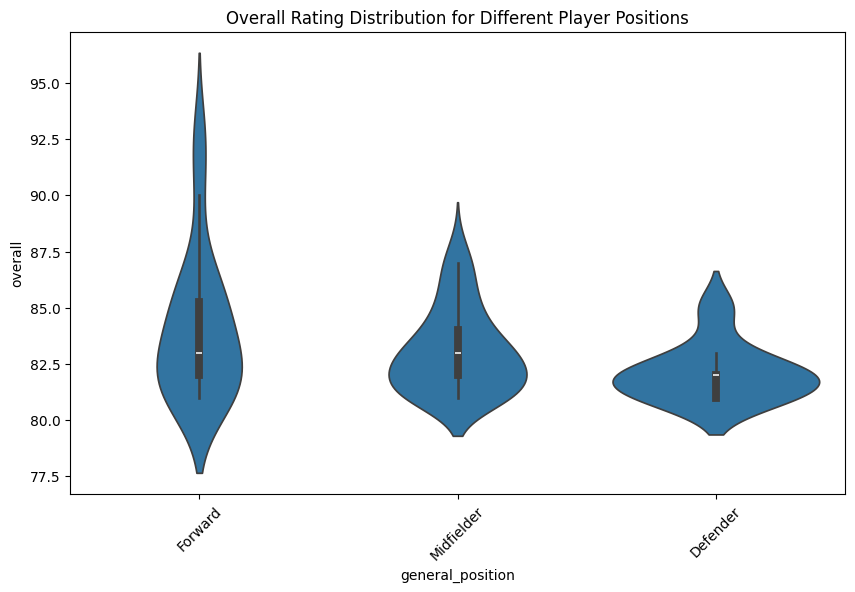

In [38]:
df_filtered = df[df['overall'] > 80]
position_mapping = {
    'CF': 'Forward', 'ST': 'Forward', 'LW': 'Forward', 'RW': 'Forward',
    'CAM': 'Midfielder', 'CM': 'Midfielder', 'CDM': 'Midfielder', 'RDM': 'Midfielder', 'LDM': 'Midfielder', 'LM': 'Midfielder', 'RM': 'Midfielder', 'LCM' : 'Midfielder', 'RCM' : 'Midfielder' ,
    'CB': 'Defender', 'LB': 'Defender', 'RB': 'Defender', 'LWB': 'Defender', 'RWB': 'Defender',
}

df['general_position'] = df['team_position'].map(position_mapping)
plt.figure(figsize=(10, 6))
sns.violinplot(x='general_position', y='overall', data=df_filtered)
plt.title('Overall Rating Distribution for Different Player Positions')
plt.xticks(rotation=45)
plt.show()

We can see in this violin plot that highest overall players are generally forwards as the distribution has extreme values beyond 90 overall. Compared to that, the midfielders have a more uniform distribution as they peak around 82 overall. Finally, defenders have a tighter distribution, with most ratings clustered around the lower end of the scale.

This is also consistent with the fact that football is a more attacking game now. Having evolved from a game with a solid defending heritage to a game with forwards enjoying the luxury of a large number of goals per season.

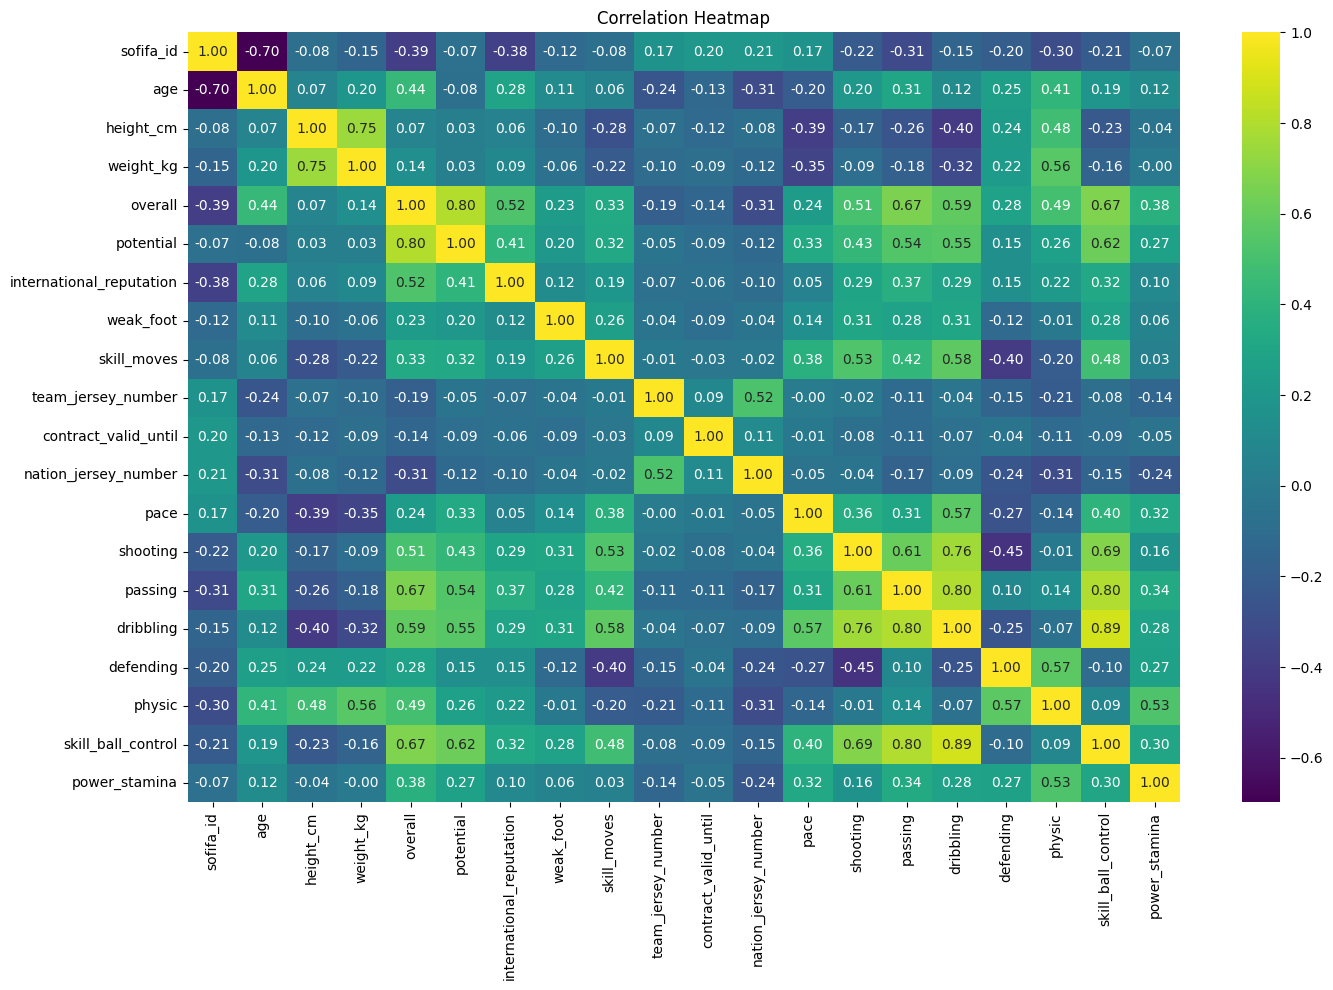

In [39]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(16,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

We can see that the correlation plot explains a lot of our other plots as well. Height has a strong positive correlation with weight, as shown in the above box plot. Potential has a strong positive correlation with overall. Age has a negative correlation with potential as potential decreases when footballers age.
Passing, dribbling, and shooting are moderately to strongly correlated with each other. This suggests that players who are good at dribbling also tend to be good at passing and shooting. Defending has a moderately positive correlation with physique and it suggests that stronger players are better defenders.



There are so many more interesting stories that can be deduced from this correlation plot.



---

For the multivariate analysis we will consider Messi, my favourite player and analyze his skills.


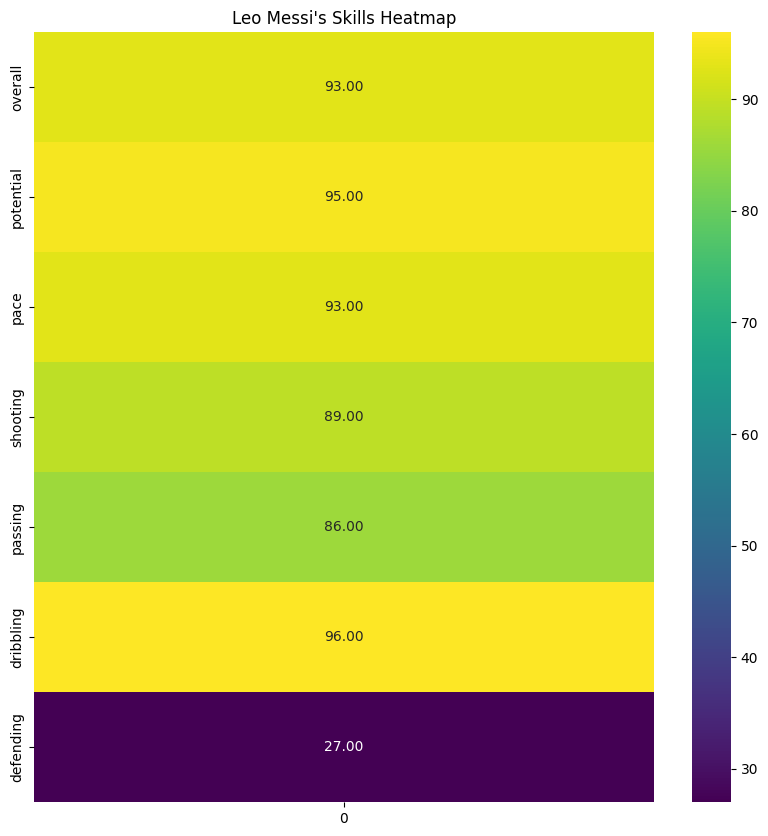

In [41]:
leo_data = df[df['short_name'] == 'L. Messi']
leo_skills = leo_data[['overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending']]
skills_transposed = leo_skills.transpose()
plt.figure(figsize=(10, 10))
sns.heatmap(skills_transposed, annot=True, cmap='viridis', fmt=".2f")
plt.title("Leo Messi's Skills Heatmap")
plt.show()

In this final multivariate visualization we can see the heatmap for Messi's attributes. He has very weak defensive traits but has some of the highest offensive traits that make him the best player in the world.